# **Algoritmo Quick-Union Ponderado**

In [1]:
import graphviz as gv

In [10]:
def makeDot(a):
    nodes = '\n '.join(['%d;'%(i) for i in range(len(a))])
    edges = '\n '.join(['%d  %d;'%(i, a[i]) for i in range(len(a)) if a[i] >= 0])
    dot = """
digraph "test" {
rankdir = BT;
%s
%s
}
"""%(nodes, edges)
    return dot

In [11]:
def drawUF(a):
    dot = gv.Digraph(comment='Nada')
    n = len(a)
    for i in range(n): #Creamos los nodos: indices de a
        dot.node(str(i), str(i))
    for i in range(n):
        if a[i] >= 0: #Si pondeeracion >= 0
            dot.edge(str(i), str(a[i])) #Dibujamos la arista
    dot.graph_attr['rankdir'] = 'BT'
    return dot

In [4]:
# Retornará la ponderacion del nodo
def find(s, a):
    i = a
    while s[i] >= 0:
        i = s[i]
    return i

In [23]:
#En el arreglo "s":
# Los indices del arreglo, son los nodos del grafo: {0,1,2,3,...,9}
# Los elementos del arreglo, son las ponderaciones, inicialmente en -1
def union(s, a, b): # "s" es el arreglo de ponderaciones
    pa = find(s, a) # el i de p | ponderacion de a
    pb = find(s, b) # el i de q | ponderacion de b
    print("  pa =",pa, ",    pb =",pb)
    if pa == pb: return
    print("s[pa]=",s[pa], ", s[pb]=",s[pb])
    if s[pa] < s[pb]:
        s[pa] += s[pb]
        s[pb] = pa
        print ("Ponderacion de p < ponderacion de q, entonces, nuevas ponderaciones para la raiz ", pa,  "p=", s[pa], "q= ", pa)
    elif s[pb] < s[pa]:
        s[pb] += s[pa]
        s[pa] = pb
        print ("Ponderacion de p > ponderacion de q, entonces, nuevas ponderaciones para la raiz ", pb,  "p=", s[pb], "q= ", pb)
    else:
        s[pa] += s[pb]  # A s[pa] se le aumenta la ponderacion de s[pb]
        s[pb] = pa      # A s[pb] se le asigna nodo pa
        print ("Igual ponderacion de p y q, entonces, nuevas ponderaciones", "p=", s[pa], "q=", s[pb])

Creamos un arreglo ponderado inicial con valores -1 para todos los elementos del conjunto.

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


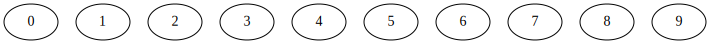

In [24]:
s = [-1 for i in range(10)]
print(s) #lista de ponderaciones
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 3 ,    pb = 4
s[pa]= -1 , s[pb]= -1
Igual ponderacion de p y q, entonces, nuevas ponderaciones p= -2 q= 3
[-1, -1, -1, -2, 3, -1, -1, -1, -1, -1]


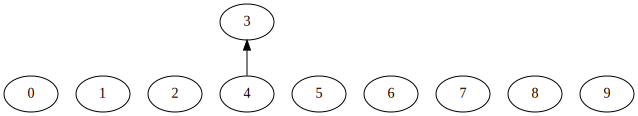

In [25]:
#Unimos 3 y 4, Tienen la misma ponderacion, entonces, la ponderacion de p sera igual a la suma de la ponderacion de p + la ponderacion de q (-1+-1) = -2.  La ponderacion de q es el i de 3 
union(s, 3, 4)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 3 ,    pb = 9
s[pa]= -2 , s[pb]= -1
Ponderacion de p < ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -3 q=  3
[-1, -1, -1, -3, 3, -1, -1, -1, -1, 3]


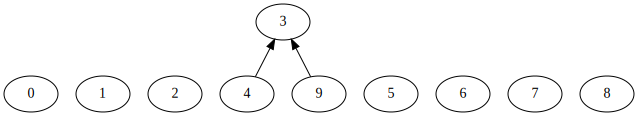

In [26]:
#Unimos 4 y 9, Tienen diferente ponderacion, p(-2) y q(-1).  Cambiamos la ponderacion de la raiz de 4 que es 3.
union(s, 4, 9)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 8 ,    pb = 0
s[pa]= -1 , s[pb]= -1
Igual ponderacion de p y q, entonces, nuevas ponderaciones p= -2 q= 8
[8, -1, -1, -3, 3, -1, -1, -1, -2, 3]


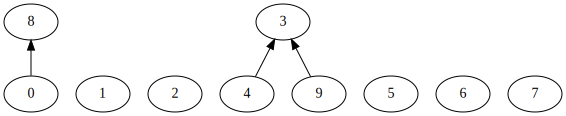

In [27]:
union(s, 8, 0)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 2 ,    pb = 3
s[pa]= -1 , s[pb]= -3
Ponderacion de p > ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -4 q=  3
[8, -1, 3, -4, 3, -1, -1, -1, -2, 3]


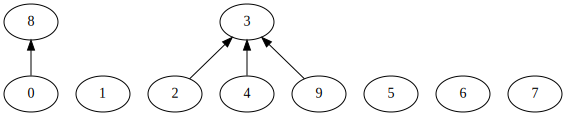

In [28]:
union(s, 2, 3)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 5 ,    pb = 6
s[pa]= -1 , s[pb]= -1
Igual ponderacion de p y q, entonces, nuevas ponderaciones p= -2 q= 5
[8, -1, 3, -4, 3, -2, 5, -1, -2, 3]


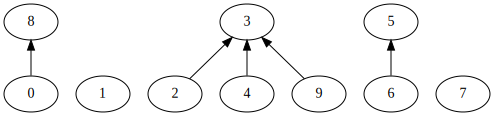

In [29]:
union(s, 5, 6)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 5 ,    pb = 3
s[pa]= -2 , s[pb]= -4
Ponderacion de p > ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -6 q=  3
[8, -1, 3, -6, 3, 3, 5, -1, -2, 3]


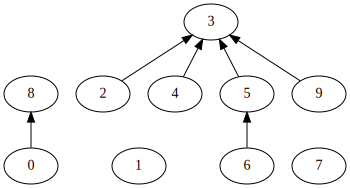

In [30]:
union(s, 5, 9)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 7 ,    pb = 3
s[pa]= -1 , s[pb]= -6
Ponderacion de p > ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -7 q=  3
[8, -1, 3, -7, 3, 3, 5, 3, -2, 3]


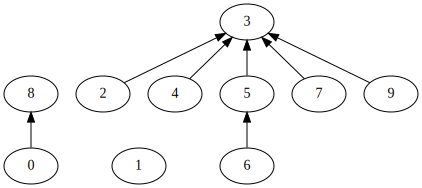

In [31]:
union(s, 7, 3)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 3 ,    pb = 8
s[pa]= -7 , s[pb]= -2
Ponderacion de p < ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -9 q=  3
[8, -1, 3, -9, 3, 3, 5, 3, 3, 3]


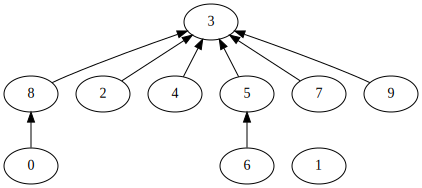

In [32]:
union(s, 4, 8)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot

  pa = 3 ,    pb = 1
s[pa]= -9 , s[pb]= -1
Ponderacion de p < ponderacion de q, entonces, nuevas ponderaciones para la raiz  3 p= -10 q=  3
[8, 3, 3, -10, 3, 3, 5, 3, 3, 3]


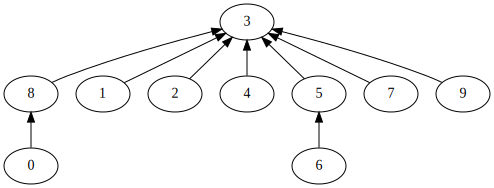

In [33]:
union(s, 6, 1)
print(s)
#gv.Source(drawUF(s))
dot = drawUF(s)
dot